# Simple Linear Regression

In [105]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [106]:
df =pd.read_csv('dataset\placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [107]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

Text(0, 0.5, 'Package in LPA')

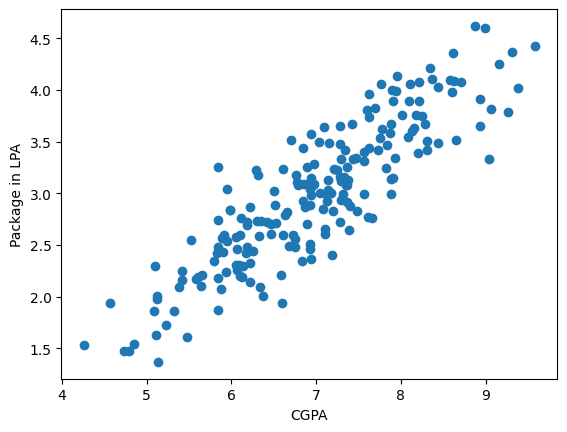

In [108]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

In [109]:
X =df.iloc[:,0:1]
Y =df.iloc[:,-1]


In [110]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [111]:
Y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [113]:
X_train.head()

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77


In [114]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()



In [115]:
lr.fit(X_train ,Y_train)

LinearRegression()

In [116]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [117]:
Y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [127]:
Y_predict = lr.predict(X_test)

In [118]:
lr.predict(X_test.iloc[0].values.reshape(-1,1))

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [119]:
lr.predict(X_test.iloc[1].values.reshape(-1,1))

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

In [120]:
lr.predict(X_test.iloc[2].values.reshape(-1,1))

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

Text(0, 0.5, 'Package in LPA')

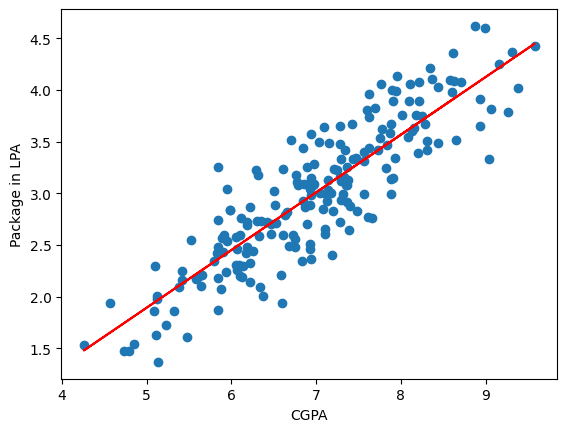

In [121]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train['cgpa'],lr.predict(X_train) ,color ='red') # the best fit line 
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')

y = mx + c

In [122]:
k = lr.coef_ # slope  m or k
k

array([0.55795197])

In [123]:
c =lr.intercept_ # intercepting line 
c

-0.8961119222429144

In [124]:
# y =mx +c 
y=k*8.58 + c 

print("actual package :  4.10")
print("Predicted by Algoritm ", y,"lpa")

actual package :  4.10
Predicted by Algoritm  [3.89111601] lpa


In [125]:
lr.n_features_in_

1

Regression Metrices


In [128]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(Y_test,Y_predict)) # unit -lpa
print("MSE",mean_squared_error(Y_test,Y_predict))  # unit -lpa *lpa
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_predict))) # unit- lpa
print("R2", r2_score(Y_test,Y_predict)) # unit -lpa


MAE 0.2884710931878175
MSE 0.12129235313495527
RMSE 0.34827051717731616
R2 0.780730147510384


In [129]:
X_test.shape

(40, 1)

In [131]:
# calculating adjusted r2
r2 =r2_score(Y_test,Y_predict)
adjusted_r2 = 1 - ((1-r2)*(40-1))/(40-1-1)  # X_test shape  = 40--->rows
                                           #                1---> input column
print("Adjusted_R2_Score",adjusted_r2)

Adjusted_R2_Score 0.7749598882343415


# Mathematical calculating SLR

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split


class MeraLR:
    def __init__(self):
    
      self.b = None
      self.m = None 
      
    def fit(self,A_train ,B_train):
        #print(A_train.shape)
        num = 0
        den = 0
        for i in range(A_train.shape[0]):
              num = num + ((A_train[i] -A_train.mean())*(B_train[i]-B_train.mean()))
              den = den + ((A_train[i] -A_train.mean())*(A_train[i] -A_train.mean()))
        self.m =num/den  
        self.b =B_train.mean() -(self.m*A_train.mean())
        # Return the slope and intercept
        return self.m, self.b
        
              
    def predict(self,A_test):
        b_predict =  self.m *X_test +self.b
        return b_predict

data =pd.read_csv('dataset\placement.csv') 
A =df.iloc[:,0].values 
B  =df.iloc[:,1].values

A_train ,A_test,B_train,B_test =train_test_split(A,B,test_size=0.2,random_state=2)

slr = MeraLR()
print(slr.fit(A_train ,B_train))





  
    

(0.5579519734250721, -0.8961119222429152)


In [103]:

c =slr.predict(A_test)
print(c.iloc[1]) 

cgpa    3.093245
Name: 29, dtype: float64
